## K-최근접 이웃 (K-Nearest Neighbors, KNN) 

K-최근접 이웃 (KNN)는 간단하지만 강력한 분류 및 회귀 알고리즘입니다. 

이 알고리즘은 거리를 기반으로 예측을 수행하며, 새로운 데이터 포인트가 주어졌을 때 가장 가까운 K개의 이웃을 찾아 다수결 투표를 통해 클래스를 예측합니다.

[KNN 알고리즘 설명]

훈련 데이터 준비: 알고리즘은 레이블이 있는 데이터 포인트를 사용하여 학습합니다.

거리 계산: 새로운 데이터 포인트가 주어지면, 훈련 데이터의 각 포인트와의 거리를 계산합니다.

일반적으로 유클리드 거리 (Euclidean Distance)를 사용합니다.

K개의 가장 가까운 이웃 선택: 거리 계산 결과를 기반으로 가장 가까운 K개의 이웃을 선택합니다.
    
다수결 투표: 선택된 이웃의 클래스 중 가장 많은 클래스가 새로운 데이터 포인트의 예측값이 됩니다.

## 1. 사례 1

### 1.1 라이브러리

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

### 1.2 데이터 생성 (두 개의 클래스로 구분되는 데이터셋 생성)

In [ ]:
# 1. X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)
# make_blobs(): scikit-learn 라이브러리의 datasets 모듈에 있는 함수로, **클러스터링(clustering)**을 위해 임의의 데이터셋을 생성하는 데 사용됩니다. 이 함수는 지정된 수의 클러스터를 중심으로 데이터를 생성하며, 데이터의 분포와 모양을 조절할 수 있습니다.

# n_samples=100: 생성할 데이터의 샘플 수를 지정합니다. 여기서는 총 100개의 데이터 포인트를 생성합니다.
# centers=2: 데이터의 클러스터(군집) 개수를 지정합니다. 여기서는 두 개의 클러스터를 생성하여, 각 클러스터가 하나의 클래스에 대응하도록 합니다. 즉, Class 0과 Class 1의 두 클래스를 가지는 데이터셋을 생성합니다.
# random_state=42: 무작위성을 고정하기 위한 매개변수입니다. 이 값을 설정함으로써 매번 같은 데이터를 생성할 수 있습니다. 이는 실험의 재현성을 확보하기 위해 사용됩니다.
# cluster_std=1.5: 각 클러스터의 표준 편차를 지정하여, 데이터 포인트들이 클러스터 중심에서 얼마나 퍼져 있는지를 설정합니다. 값이 클수록 클러스터 내부의 데이터가 더 넓게 퍼지게 됩니다. 여기서는 1.5로 설정하여 각 클러스터가 약간 넓게 분포하도록 설정합니다.

# X, y:
# X*는 생성된 입력 특성(feature) 데이터로, 각 행은 하나의 데이터 포인트를 나타내고, 각 열은 해당 포인트의 특성 값을 나타냅니다. 
# 여기서는 2차원 특성(두 개의 피처)을 가지는 100개의 데이터 포인트가 생성됩니다.
# y**는 각 데이터 포인트의 레이블(클래스 정보)을 나타내는 배열로, 0 또는 1 값을 가집니다. 
# 이는 각각의 데이터 포인트가 어떤 클래스(클러스터)에 속하는지를 나타냅니다.

# 2. new_point = np.array([[0, -6]])
# new_point: 새로운 데이터 포인트를 정의합니다. 이 포인트는 예측 대상으로, KNN 모델이 어느 클래스에 속하는지 예측하게 될 데이터입니다.
# np.array([[0, -6]]): numpy의 array 함수를 사용하여 새로운 데이터 포인트를 생성합니다.
# 여기서 데이터 포인트는 2차원 특성을 가지며, 값은 0과 -6입니다. 이는 새로운 데이터 포인트가 (0, -6) 좌표에 위치함을 의미합니다.

In [ ]:
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)
new_point = np.array([[0, -6]])  # 새로운 데이터 포인트

### 1.3 KNN 모델 생성 및 학습

In [ ]:
# 1. k = 5
# k는 K-최근접 이웃(KNN) 알고리즘에서 사용할 최근접 이웃의 개수를 지정하는 변수입니다.
# 여기서 k = 5는 새로운 데이터 포인트의 레이블을 예측할 때 가장 가까운 5개의 이웃을 참조하겠다는 의미입니다.

# 2. knn = KNeighborsClassifier(n_neighbors=k)
# KNeighborsClassifier: scikit-learn 라이브러리에서 제공하는 K-최근접 이웃 분류기입니다.
# n_neighbors=k: 최근접 이웃의 개수를 설정하는 매개변수로, 여기서는 k=5이므로 5개의 가장 가까운 이웃을 사용해 레이블을 예측합니다.
# 이 설정은 다수결 투표를 통해 새로운 데이터의 클래스를 결정하게 합니다.
# 이 코드는 K-최근접 이웃 분류 모델(KNN 모델)을 생성하고, 이를 변수 knn에 할당합니다. 
# 생성된 knn 모델은 k=5개의 이웃을 사용하여 학습 데이터로부터 예측을 수행합니다.

# 3. knn.fit(X, y)
# .fit(): .fit() 메서드는 KNN 모델을 학습시키기 위한 메서드입니다.
# KNN은 비모수적 모델이기 때문에 명시적으로 모델을 생성하거나 매개변수를 조정하지 않고, 학습 데이터 자체를 저장해 두었다가 예측할 때 이 데이터를 참조합니다.
# X: 학습에 사용되는 입력 데이터(특성)입니다. 각 행은 하나의 데이터 포인트이며, 각 열은 해당 데이터의 특성 값을 나타냅니다.
# y: 각 데이터 포인트에 해당하는 레이블(정답)입니다. X의 각 샘플에 대한 레이블 값을 제공합니다.

In [ ]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

### 1.4 새로운 데이터 포인트의 이웃 찾기

In [ ]:
# 1. kneighbors(new_point)
# kneighbors(): scikit-learn의 KNeighborsClassifier 클래스에서 제공하는 메서드로, 주어진 데이터 포인트에 가장 가까운 K개의 이웃을 찾는 역할을 합니다.
# new_point: 이 메서드의 입력으로 사용되며, 새로운 데이터 포인트입니다. 
# 여기서는 (0, -6) 좌표에 위치한 데이터 포인트를 의미합니다.
# 이 메서드는 주어진 데이터 포인트에 대해 학습 데이터 중에서 가장 가까운 이웃들을 찾고, 그에 대한 정보를 반환합니다.

# 2. 반환값: distances, indices
# kneighbors(new_point)는 두 가지 정보를 반환합니다:
# distances: 새로운 데이터 포인트와 K개의 가장 가까운 이웃들 간의 거리를 나타내는 배열입니다. 
# 여기서 각 값은 해당 이웃과의 거리입니다.
# indices: 가장 가까운 이웃들의 인덱스를 나타내는 배열입니다. 
# 이 인덱스를 통해 학습 데이터 X에서 어떤 포인트들이 이웃인지를 확인할 수 있습니다.

In [ ]:
distances, indices = knn.kneighbors(new_point)

### 1.5 새로운 데이터 포인트의 클래스 예측

In [ ]:
# 1. knn.predict(new_point)
# knn: 여기서 knn은 이미 학습된 KNN 모델입니다. knn.fit(X, y)를 통해 데이터 X와 레이블 y로 모델을 학습한 상태입니다.
# .predict(): predict() 메서드는 주어진 입력 데이터에 대해 학습된 모델을 사용해 클래스를 예측하는 함수입니다.
# new_point: 예측하고자 하는 새로운 데이터 포인트입니다. 이 포인트의 위치는 (0, -6)이며, 이 데이터를 학습된 KNN 모델에 넣어 어느 클래스에 속하는지 예측합니다.

# 2. 예측 과정
# **K-최근접 이웃(KNN)**은 new_point와 학습 데이터 간의 거리를 계산하여, 가장 가까운 K개의 이웃을 찾습니다. 
# 여기서는 K=5이므로, new_point와 가장 가까운 5개의 이웃을 사용하여 다수결 원칙으로 클래스를 결정합니다.
# 예를 들어, new_point의 가장 가까운 5개의 이웃 중 3개가 Class 1이고 2개가 Class 0이라면, 다수결에 따라 Class 1으로 예측합니다.

# 3. 반환값: predicted_class
# predicted_class: predict() 함수의 결과로, 예측된 클래스 레이블이 반환됩니다. 이 값은 배열 형태로 반환되며, 여기서는 새로운 데이터 포인트가 속하는 클래스를 담고 있습니다.
# predicted_class[0]: predicted_class는 배열이므로, [0] 인덱스를 사용하여 예측된 클래스 값을 가져옵니다.

In [ ]:
predicted_class = knn.predict(new_point)

### 1.6 결과 출력

In [ ]:
# 1. print() 함수 :
# print(): 출력 함수로, 텍스트나 변수의 값을 화면에 표시합니다.
# 2. f"문자열" (f-string)
# f-string: 파이썬에서 문자열 포맷팅을 쉽게 할 수 있는 기능입니다. 문자열 내에 중괄호 {}를 사용하여 변수의 값을 직접 삽입할 수 있습니다.
# f"새로운 데이터 포인트의 예측 클래스: {predicted_class[0]}": 이 부분은 예측된 클래스 레이블을 문자열로 출력하는데 사용됩니다. 
# predicted_class[0] 값을 문자열 내에 삽입하여 결과를 표시합니다.
# 3. predicted_class[0]
# **predicted_class**는 knn.predict(new_point)를 통해 반환된 예측된 클래스 값을 가지고 있는 배열입니다.
# 배열 형태로 반환되기 때문에 [0] 인덱스를 사용하여 예측된 클래스 레이블을 가져옵니다.
# 예를 들어, 예측된 클래스가 1이라면 predicted_class[0]의 값은 1이 됩니다.

In [ ]:
print(f"새로운 데이터 포인트의 예측 클래스: {predicted_class[0]}")

### 1.7 시각적으로 분류 결과 표시하기

In [ ]:
# 1. plt.figure()
# plt.figure(): matplotlib 라이브러리에서 제공하는 함수로, 새로운 Figure(그림) 객체를 생성합니다. 
# 그림 객체는 **모든 그래프 요소(예: 축, 제목, 레이블 등)**가 포함된 전체 캔버스를 의미합니다.
# Figure 객체 생성을 통해 그 다음에 그려지는 플롯들이 이 Figure 위에 추가되게 됩니다.
# 2. figsize=(10, 6)
# figsize: 그래프의 크기를 설정하는 매개변수로, (가로, 세로) 형태의 튜플입니다.
# 10: 그림의 가로 길이를 설정합니다. 단위는 인치입니다.
# 6: 그림의 세로 길이를 설정합니다. 단위는 역시 인치입니다.
# 여기서는 (10, 6)으로 설정되어 있어, 가로 길이가 10인치이고 세로 길이가 6인치인 크기의 그림을 생성합니다.

In [ ]:
plt.figure(figsize=(10, 6))

### 1.8 기존 데이터 포인트 플롯

In [ ]:
# 1. plt.scatter()
# plt.scatter(): matplotlib 라이브러리에서 제공하는 함수로, 산점도(scatter plot)를 그리는 데 사용됩니다. 
# 여기서는 각 클래스의 데이터 포인트들을 2차원 평면에 산점도로 나타내고, 시각적으로 서로 다른 색상으로 구분하여 표시합니다.

# 2. X[y == 0, 0], X[y == 0, 1]
# X: make_blobs()로 생성된 입력 데이터로, 각 행은 하나의 데이터 포인트이고, 각 열은 그 포인트의 특성(Feature)입니다.
# y == 0: 레이블 y에서 **Class 0**에 속하는 데이터 포인트를 선택하는 조건입니다. 이를 통해 Class 0에 속하는 데이터 포인트들을 필터링합니다.
# X[y == 0, 0]: Class 0에 속하는 데이터 포인트들의 첫 번째 특성 값(Feature 1)을 선택합니다.
# X[y == 0, 1]: Class 0에 속하는 데이터 포인트들의 두 번째 특성 값(Feature 2)을 선택합니다.
# 즉, Class 0에 속하는 모든 포인트들을 2차원 평면에 산점도로 나타냅니다.

# 3. color='blue', label='Class 0', alpha=0.6
# color='blue': Class 0에 속하는 데이터 포인트들을 파란색으로 표시합니다.
# label='Class 0': 범례에서 Class 0이라고 레이블을 붙입니다. 이를 통해 그래프를 볼 때 파란색이 어떤 클래스를 나타내는지 알 수 있습니다.
# alpha=0.6: 점의 투명도를 설정합니다. 0은 완전히 투명하고, 1은 불투명합니다. 0.6은 중간 정도의 투명도로, 데이터 포인트들이 겹칠 때 덜 복잡하게 보이도록 합니다.

# 4. 두 번째 plt.scatter()
# X[y == 1, 0], X[y == 1, 1]: Class 1에 속하는 데이터 포인트들을 필터링하고, 첫 번째 특성과 두 번째 특성을 산점도로 나타냅니다.
# color='red': Class 1에 속하는 데이터 포인트들을 빨간색으로 표시합니다.
# label='Class 1': 범례에서 *Class 1*이라고 표시합니다.
# alpha=0.6: 투명도를 설정하여 데이터가 겹칠 때 시각적인 혼란을 줄입니다.

In [ ]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0', alpha=0.6)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1', alpha=0.6)

### 1.9 새로운 데이터 포인트 플롯

In [ ]:
# 1. plt.scatter(new_point[0, 0], new_point[0, 1], color='green', marker='*', s=200, label='New Point')

# plt.scatter(): 산점도를 그리는 함수로, 새로운 데이터 포인트를 그래프에 표시합니다.
# new_point[0, 0], new_point[0, 1]:
# new_point :  새로운 데이터 포인트로, 여기서는 (0, -6)의 좌표를 가집니다.
# new_point[0, 0]은 **첫 번째 특성(Feature 1)**의 값인 0을 나타내고, **new_point[0, 1]**은 **두 번째 특성(Feature 2)**의 값인 -6을 나타냅니다.
# 이 좌표를 사용하여 새로운 데이터 포인트를 플롯에 표시합니다.
# color='green': 데이터 포인트의 색상을 초록색으로 설정합니다.
# marker='*': 데이터 포인트의 모양을 별 모양(*)으로 설정하여 다른 포인트와 구분합니다. 이는 새로운 데이터 포인트임을 강조하기 위해 사용됩니다.
# s=200: 데이터 포인트의 크기를 설정합니다. 여기서 200은 상대적으로 큰 값으로, 새로운 데이터 포인트를 시각적으로 두드러지게 하기 위함입니다.
# label='New Point': **범례(legend)**에 표시될 레이블로, 이 포인트가 새로운 데이터 포인트임을 나타냅니다.

# 2. plt.text(new_point[0, 0] + 0.2, new_point[0, 1] - 0.5, f'Predicted: Class {predicted_class[0]}', fontsize=12, color='green')

# plt.text(): 그래프 상에 텍스트를 추가하는 함수로, 새로운 데이터 포인트 옆에 예측된 클래스 레이블을 표시합니다.
# 위치:
# new_point[0, 0] + 0.2: 텍스트의 x좌표를 설정합니다. new_point[0, 0]은 데이터 포인트의 x좌표이고, 여기에 +0.2를 더하여 텍스트가 포인트 바로 옆에 위치하도록 설정합니다.
# new_point[0, 1] - 0.5: 텍스트의 y좌표를 설정합니다. new_point[0, 1]은 데이터 포인트의 y좌표이고, 여기에 -0.5를 빼서 텍스트가 포인트 아래쪽에 위치하도록 설정합니다.
# f'Predicted: Class {predicted_class[0]}': 표시할 텍스트를 설정합니다.
# **f-string**을 사용하여 예측된 클래스 레이블(predicted_class[0])을 문자열로 포함시킵니다. 예를 들어, predicted_class[0]이 1이라면 텍스트는 **'Predicted: Class 1'**이 됩니다.
# fontsize=12: 텍스트의 글꼴 크기를 설정합니다. 12는 중간 크기로, 텍스트가 명확하게 보이도록 합니다.
# color='green': 텍스트의 색상을 초록색으로 설정하여, 초록색으로 표시된 데이터 포인트와 일관성을 유지합니다.

In [ ]:
plt.scatter(new_point[0, 0], new_point[0, 1], color='green', marker='*', s=200, label='New Point')
plt.text(new_point[0, 0] + 0.2, new_point[0, 1] - 0.5, f'Predicted: Class {predicted_class[0]}', fontsize=12, color='green')

### 1.10 K개의 이웃 연결선 그리기

In [ ]:
# 1. K개의 이웃 연결선 그리기
# for index in indices[0]:
#     plt.plot([new_point[0, 0], X[index, 0]], [new_point[0, 1], X[index, 1]], 'k--', linewidth=0.8)
# for index in indices[0]:: kneighbors() 메서드로 반환된 indices 배열을 통해 새로운 데이터 포인트와 가장 가까운 이웃의 인덱스들을 가져옵니다. indices[0]은 새로운 포인트에 대한 K개의 이웃의 인덱스 리스트입니다.
# plt.plot(): 새로운 데이터 포인트와 가장 가까운 K개의 이웃 사이에 점선을 그립니다. 이 점선을 통해 새로운 데이터 포인트와 선택된 이웃 간의 관계를 시각적으로 확인할 수 있습니다.
# [new_point[0, 0], X[index, 0]]: x좌표를 나타냅니다. 새로운 데이터 포인트와 K개의 이웃 중 하나의 x좌표를 지정합니다.
# [new_point[0, 1], X[index, 1]]: y좌표를 나타냅니다. 새로운 데이터 포인트와 K개의 이웃 중 하나의 y좌표를 지정합니다.
# 'k--': 선의 색상과 스타일을 지정합니다. 'k--'는 **검정색(k) 점선(--)**을 의미합니다.
# linewidth=0.8: 선의 두께를 지정합니다. 0.8은 상대적으로 얇은 두께로, 시각적으로 강조하지 않으면서 관계를 표현하기 위함입니다.

# 2. x축과 y축 레이블 설정
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.xlabel('Feature 1'): 그래프의 x축 레이블을 설정하여 첫 번째 특성(Feature 1)임을 표시합니다.
# plt.ylabel('Feature 2'): 그래프의 y축 레이블을 설정하여 두 번째 특성(Feature 2)임을 표시합니다.

# 3. 그래프 제목 설정
# plt.title(f'K-Nearest Neighbors (K={k}) with Predicted Class')
# plt.title(): 그래프의 제목을 설정합니다. 여기서는 K-Nearest Neighbors (K=5) with Predicted Class와 같이 K 값과 함께 제목을 표시하여 현재의 설정을 명확하게 보여줍니다.

# 4. 범례 표시
# plt.legend()
# plt.legend(): 그래프의 **범례(legend)**를 추가하여 각 데이터 포인트의 색상과 해당 클래스(Class 0, Class 1, New Point)를 시각적으로 구분할 수 있도록 합니다. 이를 통해 그래프에서 각 색상의 의미를 쉽게 파악할 수 있습니다.

# 5. 그리드 추가
# plt.grid(True)
# plt.grid(True): 그래프에 그리드 선을 추가하여 데이터 포인트와 축의 관계를 더 쉽게 확인할 수 있게 합니다. 그리드 선은 데이터의 위치와 비교하기에 유용합니다.

# 6. 그래프 표시
# plt.show()
# plt.show(): 그래프를 화면에 출력합니다. 이 함수가 호출될 때까지는 그래프가 화면에 표시되지 않으므로, 최종적으로 그래프를 표시하기 위해 이 함수가 필요합니다.

In [ ]:
for index in indices[0]:
    plt.plot([new_point[0, 0], X[index, 0]], [new_point[0, 1], X[index, 1]], 'k--', linewidth=0.8)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-Nearest Neighbors (K={k}) with Predicted Class')
plt.legend()
plt.grid(True)
plt.show()

코드 종합

새로운 데이터 포인트의 예측 클래스: 1


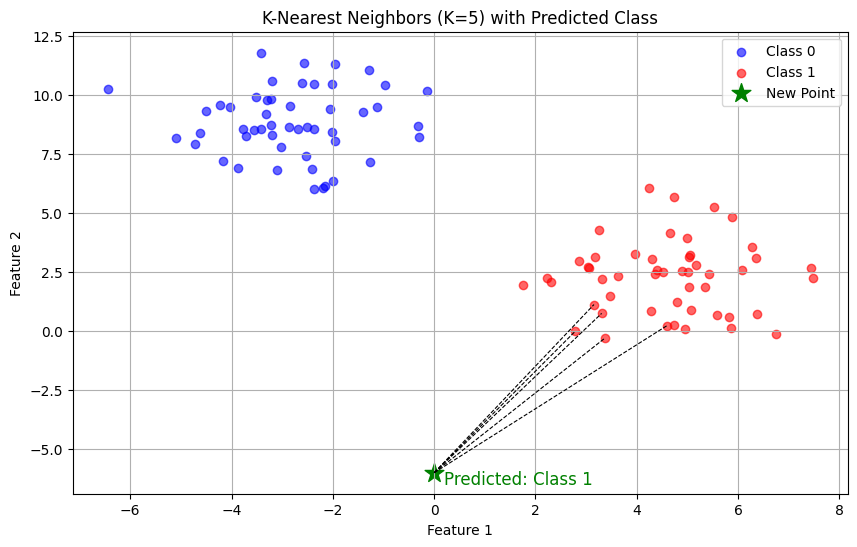

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

# 데이터 생성 (두 개의 클래스로 구분되는 데이터셋 생성)
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)
new_point = np.array([[0, -6]])  # 새로운 데이터 포인트

# KNN 모델 생성 및 학습
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# 새로운 데이터 포인트의 이웃 찾기
distances, indices = knn.kneighbors(new_point)

# 새로운 데이터 포인트의 클래스 예측
predicted_class = knn.predict(new_point)

# 결과 출력
print(f"새로운 데이터 포인트의 예측 클래스: {predicted_class[0]}")

# 시각적으로 분류 결과 표시하기
plt.figure(figsize=(10, 6))

# 기존 데이터 포인트 플롯
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0', alpha=0.6)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1', alpha=0.6)

# 새로운 데이터 포인트 플롯
plt.scatter(new_point[0, 0], new_point[0, 1], color='green', marker='*', s=200, label='New Point')
plt.text(new_point[0, 0] + 0.2, new_point[0, 1] - 0.5, f'Predicted: Class {predicted_class[0]}', fontsize=12, color='green')

# K개의 이웃 연결선 그리기
for index in indices[0]:
    plt.plot([new_point[0, 0], X[index, 0]], [new_point[0, 1], X[index, 1]], 'k--', linewidth=0.8)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-Nearest Neighbors (K={k}) with Predicted Class')
plt.legend()
plt.grid(True)
plt.show()


new_point = np.array([[-2, 5]])  # 새로운 데이터 포인트

새로운 데이터 포인트의 예측 클래스: 0


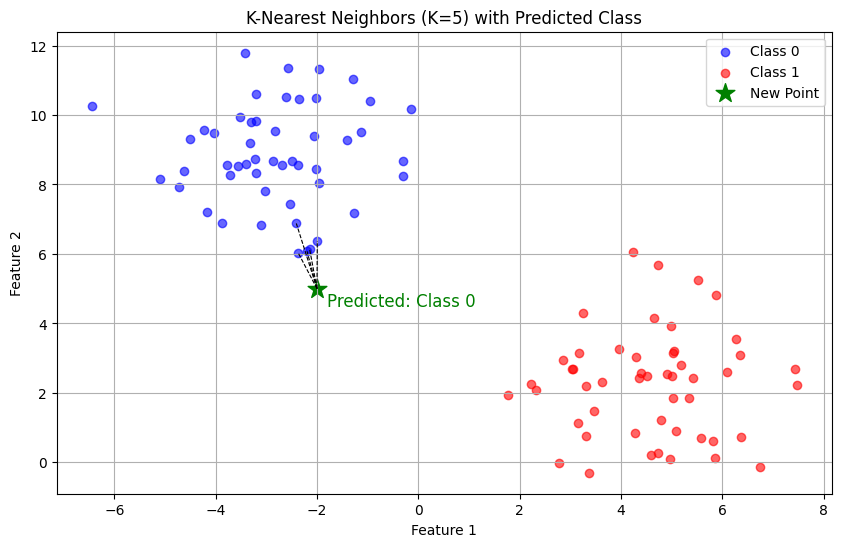

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

# 데이터 생성 (두 개의 클래스로 구분되는 데이터셋 생성)
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)
new_point = np.array([[-2, 5]])  # 새로운 데이터 포인트

# KNN 모델 생성 및 학습
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# 새로운 데이터 포인트의 이웃 찾기
distances, indices = knn.kneighbors(new_point)

# 새로운 데이터 포인트의 클래스 예측
predicted_class = knn.predict(new_point)

# 결과 출력
print(f"새로운 데이터 포인트의 예측 클래스: {predicted_class[0]}")

# 시각적으로 분류 결과 표시하기
plt.figure(figsize=(10, 6))

# 기존 데이터 포인트 플롯
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0', alpha=0.6)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1', alpha=0.6)

# 새로운 데이터 포인트 플롯
plt.scatter(new_point[0, 0], new_point[0, 1], color='green', marker='*', s=200, label='New Point')
plt.text(new_point[0, 0] + 0.2, new_point[0, 1] - 0.5, f'Predicted: Class {predicted_class[0]}', fontsize=12, color='green')

# K개의 이웃 연결선 그리기
for index in indices[0]:
    plt.plot([new_point[0, 0], X[index, 0]], [new_point[0, 1], X[index, 1]], 'k--', linewidth=0.8)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-Nearest Neighbors (K={k}) with Predicted Class')
plt.legend()
plt.grid(True)
plt.show()


### 2.붓꽃 데이터셋 (Iris Dataset)

주요 코드 설명

In [ ]:
# 데이터 로드 및 표준화: # load_iris() 함수를 사용하여 붓꽃 데이터셋을 로드하고, 특성을 표준화(StandardScaler())합니다.

# 데이터 분할: 데이터를 훈련 세트와 테스트 세트로 나눕니다 (train_test_split()).

# # 4. KNN 모델 생성 및 학습
# k = 5
# knn = KNeighborsClassifier(n_neighbors=k)
# # knn.fit(X_train, y_train)
# 1. k = 5
# k는 KNN 알고리즘에서 사용할 최근접 이웃의 개수를 설정하는 변수입니다.
# 예를 들어, k = 5일 경우, 새로운 데이터 포인트에 대해 가장 가까운 5개의 이웃을 찾아 그들 중 다수의 클래스로 예측합니다.
# k 값이 너무 작으면 모델이 과적합(overfitting)될 가능성이 높고, 너무 크면 과소적합(underfitting)될 수 있습니다. 
# k 값은 데이터에 따라 최적의 값을 찾아야 합니다.
# 2. knn = KNeighborsClassifier(n_neighbors=k)
# KNeighborsClassifier: scikit-learn 라이브러리에서 제공하는 K-최근접 이웃(KNN) 분류 모델입니다.
# KNN 알고리즘은 비모수적 모델(non-parametric model)로, 학습 단계에서 명시적인 모델을 생성하지 않고 데이터를 저장해 두었다가, 예측할 때 각 데이터 포인트에 가장 가까운 이웃들을 기준으로 클래스를 예측하는 방식입니다.
# 이웃 간의 거리는 일반적으로 유클리드 거리(Euclidean distance)를 사용해 계산합니다.
# n_neighbors=k: 최근접 이웃의 개수를 지정하는 매개변수로, 여기서는 k=5이므로, 예측 시 5개의 가장 가까운 데이터 포인트의 레이블을 참조합니다.
# 이 코드는 KNeighborsClassifier 객체를 생성하고, 이를 변수 knn에 저장합니다.
# 3. knn.fit(X_train, y_train)
# .fit(): KNN은 기본적으로 비모수적 모델이라 학습 단계에서 명시적인 모델을 생성하지는 않지만, .fit() 메서드를 사용하여 학습 데이터(X_train, y_train)를 저장합니다.
# X_train: 학습에 사용되는 입력 특성 데이터입니다. 각 행은 하나의 데이터 샘플을 나타내며, 각 열은 해당 샘플의 특성입니다.
# y_train: 학습에 사용되는 데이터의 **레이블(정답 값)**입니다. X_train의 각 샘플에 해당하는 레이블 값을 제공합니다.
# 따라서, knn.fit(X_train, y_train)은 학습 데이터를 knn 모델에 저장해 두고, 이후 예측 시 사용할 준비를 하는 과정입니다. 
# KNN은 학습할 때 실제로 모델을 생성하지 않지만, 데이터를 저장해 둔 후 예측할 때 이 데이터를 참조하여 클래스를 예측합니다.

# 모델 평가: 테스트 데이터에서 예측을 수행하고, 정확도, 혼동 행렬, 분류 보고서를 출력합니다.

# K 값에 따른 정확도 시각화: # K 값을 1부터 20까지 변경하며, 각 K 값에 대한 정확도를 그래프로 시각화합니다.


KNN 모델 정확도 (K=5): 1.0000

혼동 행렬:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

분류 보고서:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



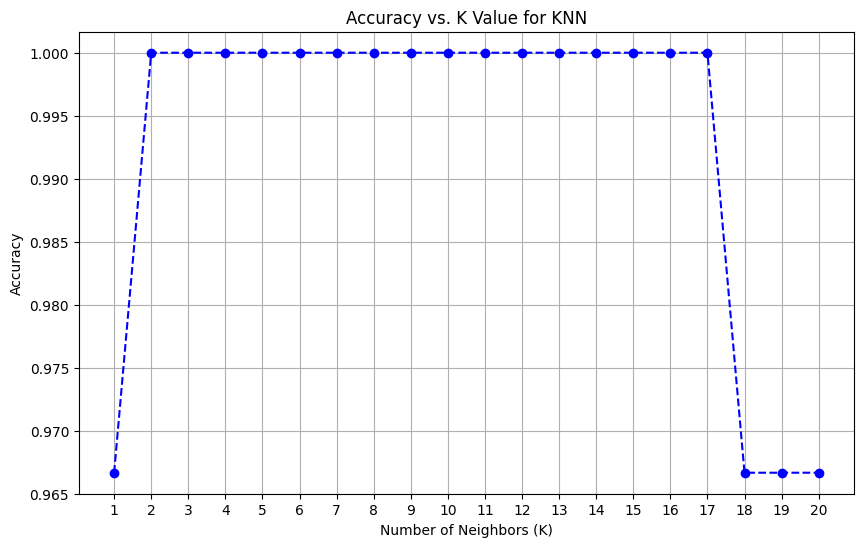

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# 1. 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target

# 2. 데이터 표준화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3. 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. KNN 모델 생성 및 학습
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# 5. 모델 평가
y_pred = knn.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"\nKNN 모델 정확도 (K={k}): {accuracy:.4f}")

# 혼동 행렬 및 분류 보고서 출력
cm = confusion_matrix(y_test, y_pred)
print("\n혼동 행렬:\n", cm)
print("\n분류 보고서:\n", classification_report(y_test, y_pred))

# 6. 정확도 시각화 (K 값에 따른 정확도)
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# 정확도 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.title('Accuracy vs. K Value for KNN')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()


결과 해석

정확도:

K=5일 때, 테스트 세트에서 100% 정확도를 달성했습니다.
    
혼동 행렬:

모든 샘플이 정확하게 분류되었습니다 (오류가 없음).

K 값에 따른 정확도:

그래프를 통해 K 값이 증가함에 따라 정확도가 어떻게 변화하는지 확인할 수 있습니다.
    
일반적으로, K 값이 너무 작으면 모델이 과적합(overfitting)될 수 있고, K 값이 너무 크면 모델이 과소적합(underfitting)될 수 있습니다.

### 3. Kaggle 또는 Google TensorFlow : 신용카드 사기 탐지 데이터셋

In [ ]:
# 코드 설명
# 데이터 로드: creditcard.csv 파일을 로드합니다.
# 전처리:
# Class 컬럼에서 사기(1)와 정상(0) 거래의 비율을 확인합니다.
# 언더샘플링을 통해 불균형 문제를 완화할 수 있습니다.
# 스케일링: StandardScaler를 사용하여 데이터를 정규화합니다.
# 모델 학습 및 평가: KNN 모델을 학습하고 평가합니다.
# K 값 최적화: 에러율 그래프를 통해 최적의 K 값을 찾을 수 있습니다.

In [ ]:
# 데이터 셋 다운로드하여 경로 설정 함.

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

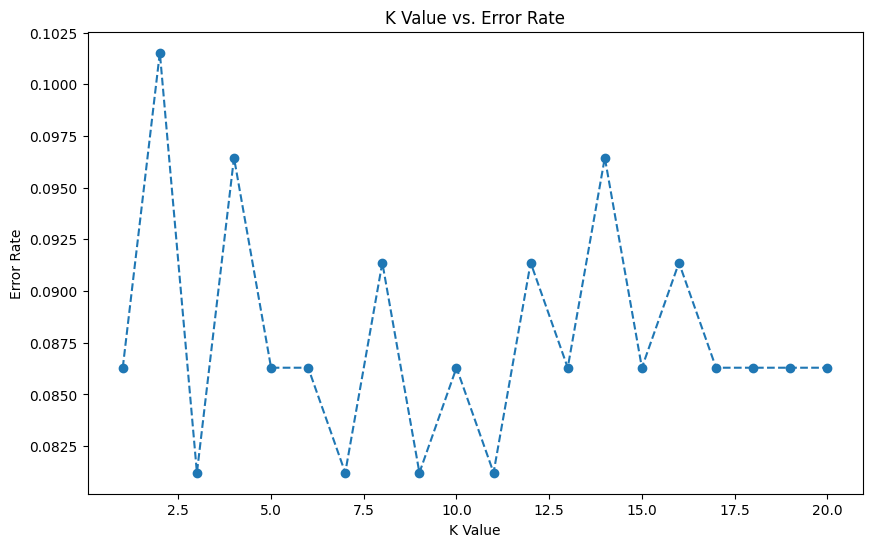

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# 1. 데이터 로드 (Kaggle의 creditcard.csv 파일 경로를 지정하세요)
df = pd.read_csv('creditcard.csv')

# 2. 데이터 탐색
print(df.head())
print(df.info())
print(df['Class'].value_counts())

# 3. 데이터 전처리
# 불균형 데이터 문제를 해결하기 위해 언더샘플링 수행 (선택 사항)
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0].sample(len(fraud), random_state=42)
balanced_df = pd.concat([fraud, non_fraud])

# 특징 변수와 타겟 변수 분리
X = balanced_df.drop(columns=['Class'])
y = balanced_df['Class']

# 데이터 스케일링 (Amount 컬럼은 특히 중요)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. 데이터 분할 (Train/Test Split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. KNN 모델 생성 및 학습
k = 5  # K 값 설정
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# 6. 모델 평가
y_pred = knn.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 혼동 행렬 출력
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 분류 보고서 출력
print("Classification Report:\n", classification_report(y_test, y_pred))

# 7. K 값 최적화 (옵션)
error_rates = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    error = np.mean(y_pred_k != y_test)
    error_rates.append(error)

# 에러율 그래프
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rates, marker='o', linestyle='--')
plt.title('K Value vs. Error Rate')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()
